In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#print(plt.style.available)
plt.style.use('fivethirtyeight')

In [20]:
!ls Datasets/CovidIndia/

AgeGroupDetails.csv             StatewiseTestingDetails.csv
HospitalBedsIndia.csv           covid_19_india.csv
ICMRTestingLabs.csv             population_india_census2011.csv
IndividualDetails.csv


In [21]:
df = pd.read_csv('Datasets/CovidIndia/covid_19_india.csv')
#df.head()
df.drop(['Sno','Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 'columns', inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%y')
df.set_index('Date', inplace=True)
df.rename(columns = {'Cured' : 'Recovered','State/UnionTerritory' : 'State'}, inplace = True)
df

,State,Recovered,Deaths,Confirmed
Date,,,,
2020-01-30,Kerala,0,0,1
2020-01-31,Kerala,0,0,1
2020-02-01,Kerala,0,0,2
2020-02-02,Kerala,0,0,3
2020-02-03,Kerala,0,0,3
...,...,...,...,...
2020-09-02,Telengana,97402,846,130589
2020-09-02,Tripura,7847,118,12702
2020-09-02,Uttarakhand,14076,280,20398


In [22]:
# df.loc['2020-08-29',['Recovered','Deaths','Confirmed']].sum()
# df.loc['2020-08-30',['Recovered','Deaths','Confirmed']].sum()
india_df = df.resample('D').sum()
india_df['Active'] = india_df['Confirmed'] - india_df['Recovered'] - india_df['Deaths']
india_df.head()

,Recovered,Deaths,Confirmed,Active
Date,,,,
2020-01-30,0,0,1,1
2020-01-31,0,0,1,1
2020-02-01,0,0,2,2
2020-02-02,0,0,3,3
2020-02-03,0,0,3,3


In [23]:
india_df.loc['2020-09-02']

Recovered    2901908
Deaths         66333
Confirmed    3769523
Active        801282
Name: 2020-09-02 00:00:00, dtype: int64

In [24]:
def figure_plot(df, columns, colors, xlabel,ylabel,title,fig_size=(16,9),legend=True):
    #plt.xkcd()
    df.plot(figsize=fig_size,y = columns, color = colors,legend=legend)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.savefig(f'{title}.pdf')
    
    

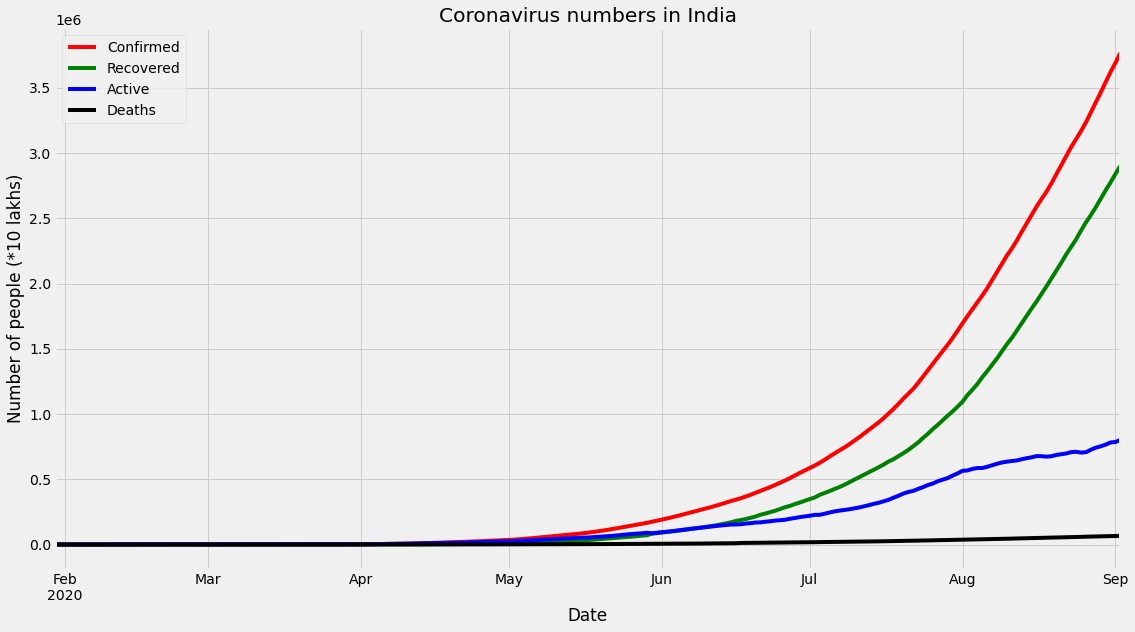

In [25]:
figure_plot(india_df, columns = ["Confirmed", "Recovered", "Active", "Deaths"], colors = ['r','g','b','k'],
           xlabel='Date', ylabel='Number of people (*10 lakhs)', title='Coronavirus numbers in India')

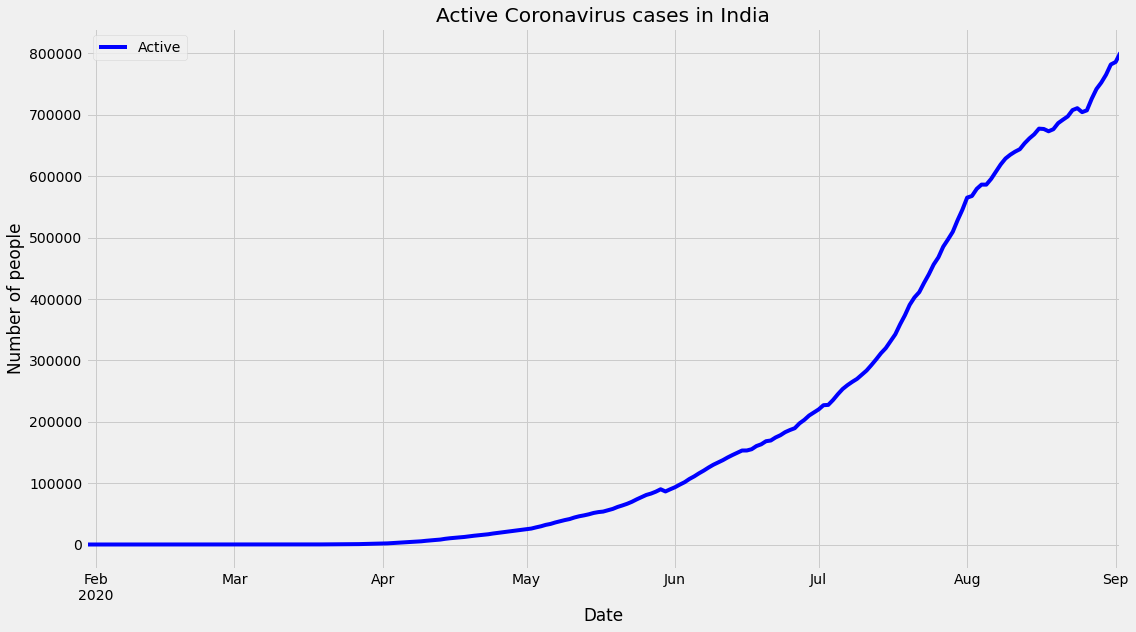

In [26]:
figure_plot(india_df, columns = ["Active"], colors = ['b'],
           xlabel='Date', ylabel='Number of people', title='Active Coronavirus cases in India',legend=True)

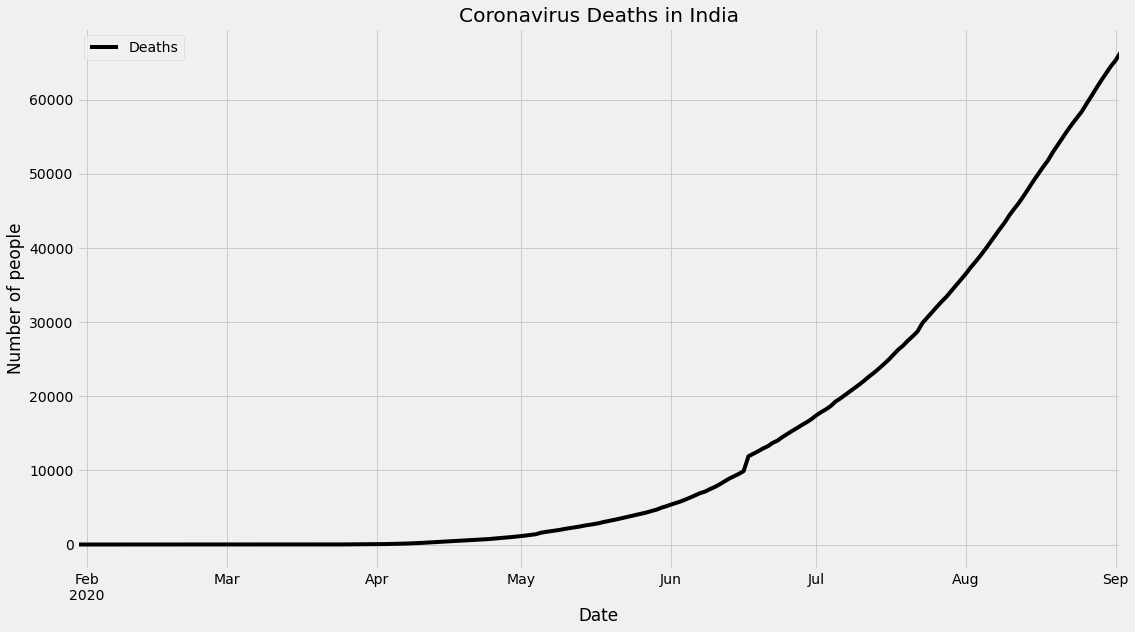

In [27]:
figure_plot(india_df, columns = ["Deaths"], colors = ['k'],
           xlabel='Date', ylabel='Number of people', title='Coronavirus Deaths in India',legend=True)

In [28]:
india_df['DailyNewCases'] = india_df['Confirmed'].diff()
india_df['DailyNewDeaths'] = india_df['Deaths'].diff()
india_df['DailyNewRecovered'] = india_df['Recovered'].diff()
india_df

,Recovered,Deaths,Confirmed,Active,DailyNewCases,DailyNewDeaths,DailyNewRecovered
Date,,,,,,,
2020-01-30,0,0,1,1,NaN,NaN,NaN
2020-01-31,0,0,1,1,0.0,0.0,0.0
2020-02-01,0,0,2,2,1.0,0.0,0.0
2020-02-02,0,0,3,3,1.0,0.0,0.0
2020-02-03,0,0,3,3,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-08-29,2648998,62550,3463972,752424,76472.0,1021.0,65050.0
2020-08-30,2713933,63498,3542733,765302,78761.0,948.0,64935.0
2020-08-31,2774801,64469,3621245,781975,78512.0,971.0,60868.0


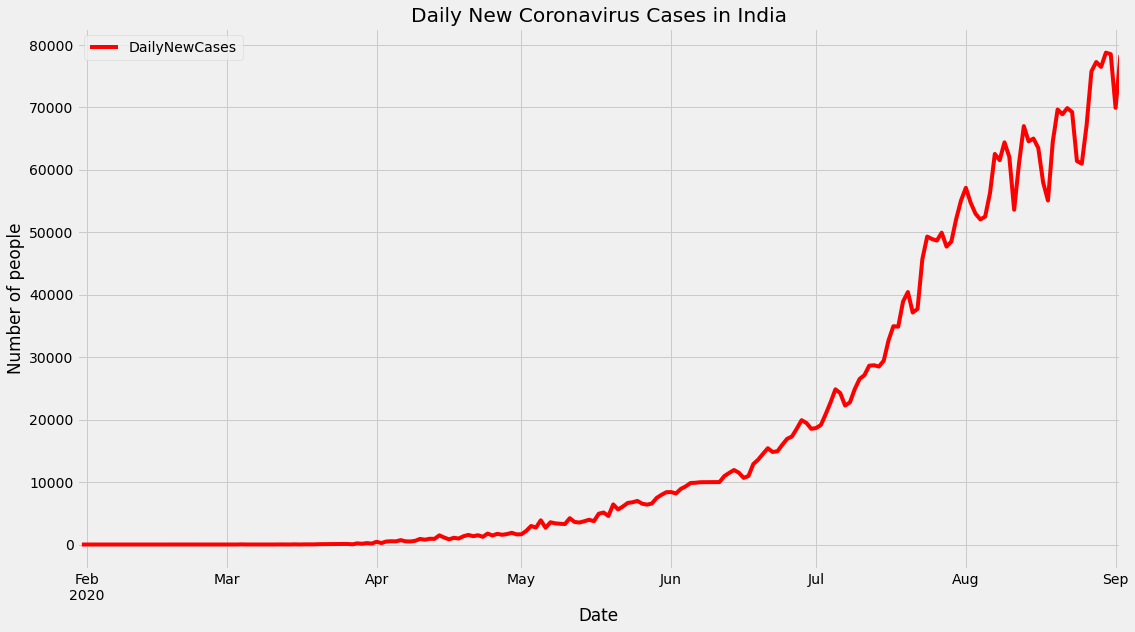

In [29]:
figure_plot(india_df, columns = ["DailyNewCases"], colors = ['r'],
           xlabel='Date', ylabel='Number of people', title='Daily New Coronavirus Cases in India',legend=True)

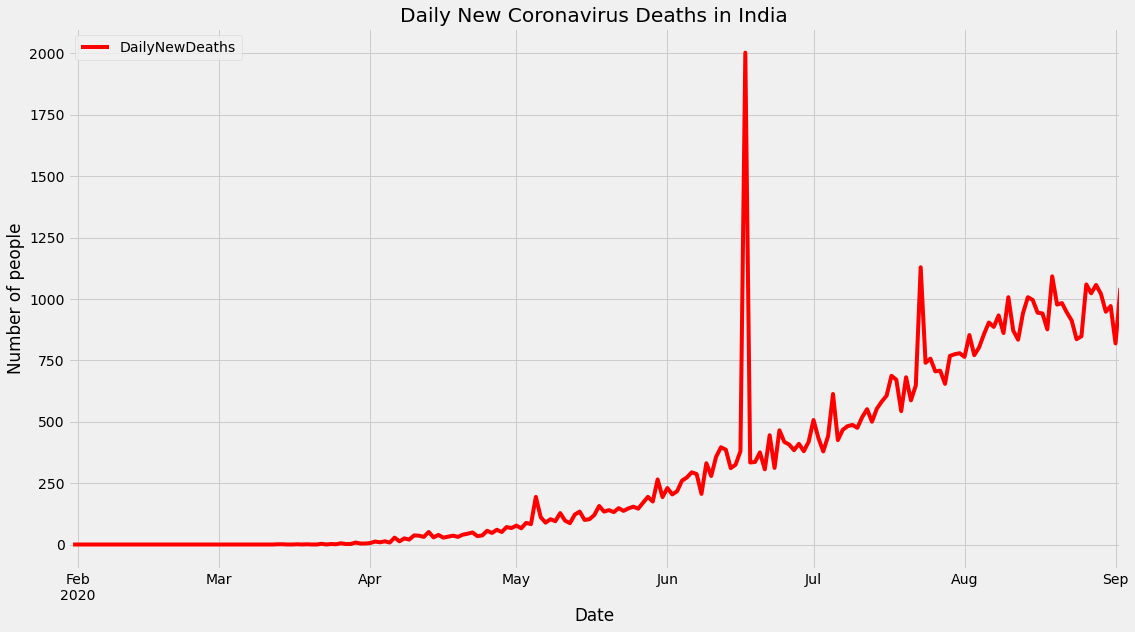

In [30]:
figure_plot(india_df, columns = ["DailyNewDeaths"], colors = ['r'],
           xlabel='Date', ylabel='Number of people', title='Daily New Coronavirus Deaths in India',legend=True)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

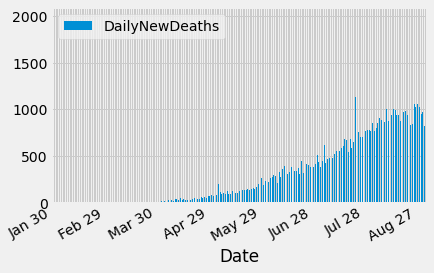

In [27]:
ax = india_df.plot(y='DailyNewDeaths', kind='bar')
ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(india_df.index)

# Every 4th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b %d') for item in india_df.index[::30]]

#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.show()

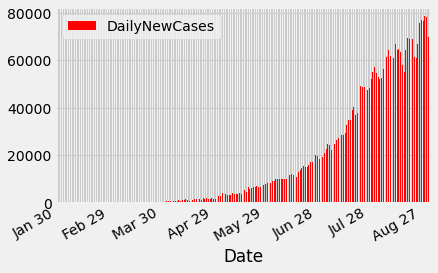

In [28]:
ax = india_df.plot(y='DailyNewCases', kind='bar', color='r')
ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(india_df.index)

# Every 4th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b %d') for item in india_df.index[::30]]

#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.show()

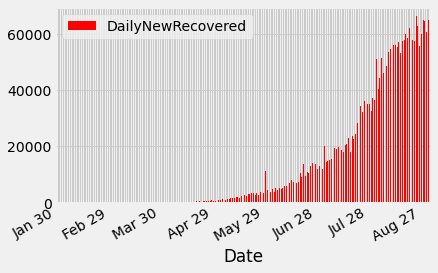

In [29]:
ax = india_df.plot(y='DailyNewRecovered', kind='bar', color='r')
ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(india_df.index)

# Every 4th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b %d') for item in india_df.index[::30]]

#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.show()

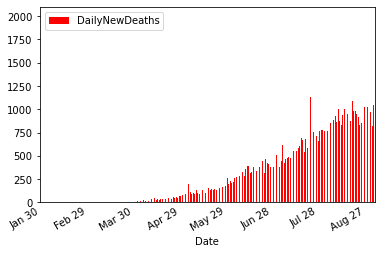

In [109]:
ax = india_df.plot(y='DailyNewDeaths', kind='bar', color='r')
ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(india_df.index)

# Every 4th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b %d') for item in india_df.index[::30]]

#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.show()

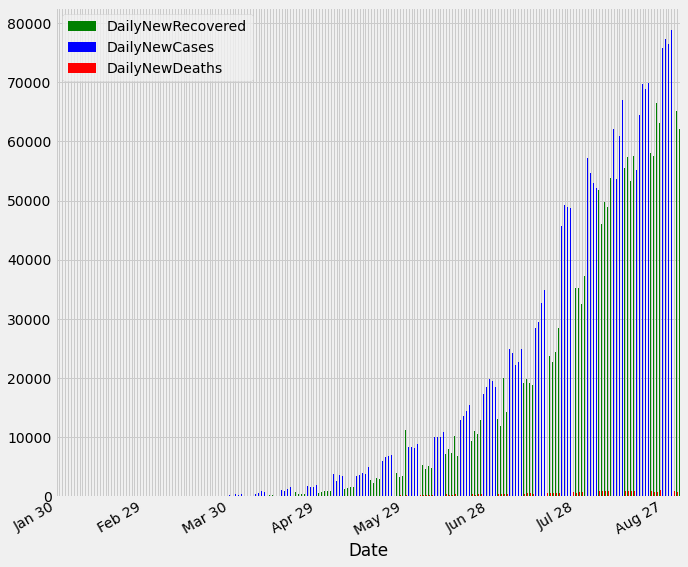

In [84]:
ax = india_df.plot(figsize=(10,10),y=['DailyNewRecovered','DailyNewCases','DailyNewDeaths'], kind='bar', color=['g', 'b','r'])
ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(india_df.index)

# Every 4th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b %d') for item in india_df.index[::30]]

#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.show()

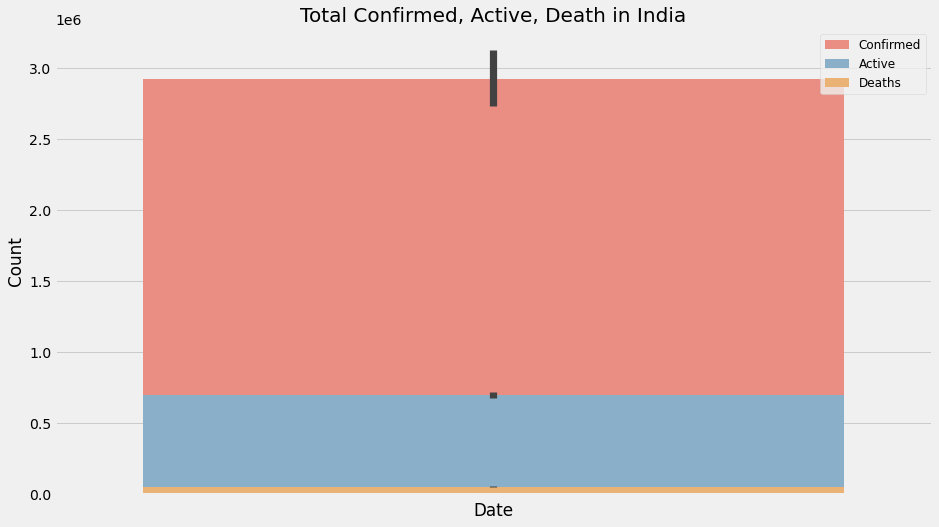

In [90]:
import seaborn as sns
df2=india_df.tail(25)
#df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,y='Active',color=sns.color_palette('Set3')[4],label='Active')
sns.barplot(data=df2,y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12);

In [95]:
# start = pd.to_datetime("5-1-2012")
# idx = pd.date_range(start, periods= 365)
# df = pd.DataFrame({'A':np.random.random(365), 'B':np.random.random(365)})
# df.index = idx
# df_ts = df.resample('W', how= 'max')

ax = df_ts.plot(y='Deaths', kind='bar', x=df_ts.index, stacked=True)
#ax.tick_params(axis = 'x', length=0)
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_ts.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%b %d') for item in df_ts.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))


plt.gcf().autofmt_xdate()

plt.show()

KeyError: "None of [DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',\n               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',\n               '2020-02-07', '2020-02-08',\n               ...\n               '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',\n               '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',\n               '2020-09-01', '2020-09-02'],\n              dtype='datetime64[ns]', name='Date', length=217, freq='D')] are in the [columns]"